In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 600)

config = dict()

with open('config.json', 'r') as f:
    config = json.load(f)

In [2]:
ts_col = ['sam_id', 'ad_id', 'est_time', 'ad_size', 'ad_ind_id', 'item_type', 
          'item_id', 'ad_acc_id', 'period', 'user', 'price']

In [3]:
test_sam = pd.read_csv(config['dir_data']+config['file_ts_sm'], sep='\t', names=ts_col)

In [4]:
test_sam.head()

,sam_id,ad_id,est_time,ad_size,ad_ind_id,item_type,item_id,ad_acc_id,period,user,price
0,1,394352,1529648412,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120
1,2,585401,1553076190,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42
2,3,419408,1553031394,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6
3,4,405326,1553238836,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181
4,5,578942,1541191585,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31


In [5]:
test_sam.shape

(20290, 11)

In [6]:
test_sam.dtypes

sam_id        int64
ad_id         int64
est_time      int64
ad_size       int64
ad_ind_id     int64
item_type     int64
item_id       int64
ad_acc_id     int64
period       object
user         object
price         int64
dtype: object

In [32]:
test_sam['period_cnt'] = test_sam['period'].apply(lambda x: len(str(x).split(',')))

In [33]:
# del period_cnt
print(test_sam['period_cnt'].unique())
del test_sam['period_cnt']

[7]


In [124]:
period_uniq_cnt = test_sam['period'].apply(lambda x: len([*set(str(x).split(','))]))
period_uniq_cnt.max()

4

In [126]:
import collections

collections.Counter(period_uniq_cnt)

Counter({1: 19968, 3: 63, 2: 239, 4: 20})

**Note:** not too much records got different ad periods. should we just take one or multiple periods?

In [133]:
size_cnt = test_sam['ad_size'].apply(lambda x: len(str(x).split(',')))
size_cnt.max()

1

In [29]:
test_sam['user_att_cnt'] = test_sam['user'].apply(lambda x: len(str(x).split('|')))

In [30]:
# del user_att_cnt
test_sam['user_att_cnt'].unique()

array([1, 4, 3, 2, 7, 5, 6])

In [7]:
import time

def timestamp_datetime(timestamp):
    return time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp))

In [38]:
# test_sam['est_realtime'] = test_sam['est_time'].apply(timestamp_datetime)
# test_sam['est_realtime'].head()

0    2018-06-22 14:20:12
1    2019-03-20 18:03:10
2    2019-03-20 05:36:34
3    2019-03-22 15:13:56
4    2018-11-03 04:46:25
Name: est_realtime, dtype: object

In [8]:
def extend_time(df, time_col):
    df['realtime'] = df[time_col].apply(timestamp_datetime)
    df['realtime'] = pd.to_datetime(df['realtime'])
    test_sam[time_col+'_year'] = test_sam['realtime'].dt.year
    test_sam[time_col+'_mon'] = test_sam['realtime'].dt.month
    test_sam[time_col+'_day'] = test_sam['realtime'].dt.day
    test_sam[time_col+'_weekday'] = test_sam['realtime'].dt.dayofweek
    test_sam[time_col+'_hour'] = test_sam['realtime'].dt.hour
    del df[time_col]
    return df

In [9]:
# test_sam['est_realtime'] = pd.to_datetime(test_sam['est_realtime'])
# test_sam['est_year'] = test_sam['est_realtime'].dt.year
# test_sam['est_mon'] = test_sam['est_realtime'].dt.month
# test_sam['est_day'] = test_sam['est_realtime'].dt.day
# test_sam['est_weekday'] = test_sam['est_realtime'].dt.dayofweek
# test_sam['est_hour'] = test_sam['est_realtime'].dt.hour

# del test_sam['est_time']

test_sam = extend_time(test_sam, 'est_time')
test_sam.head()

,sam_id,ad_id,ad_size,ad_ind_id,item_type,item_id,ad_acc_id,period,user,price,realtime,est_time_year,est_time_mon,est_time_day,est_time_weekday,est_time_hour
0,1,394352,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120,2018-06-22 14:20:12,2018,6,22,4,14
1,2,585401,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42,2019-03-20 18:03:10,2019,3,20,2,18
2,3,419408,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6,2019-03-20 05:36:34,2019,3,20,2,5
3,4,405326,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181,2019-03-22 15:13:56,2019,3,22,4,15
4,5,578942,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31,2018-11-03 04:46:25,2018,11,3,5,4


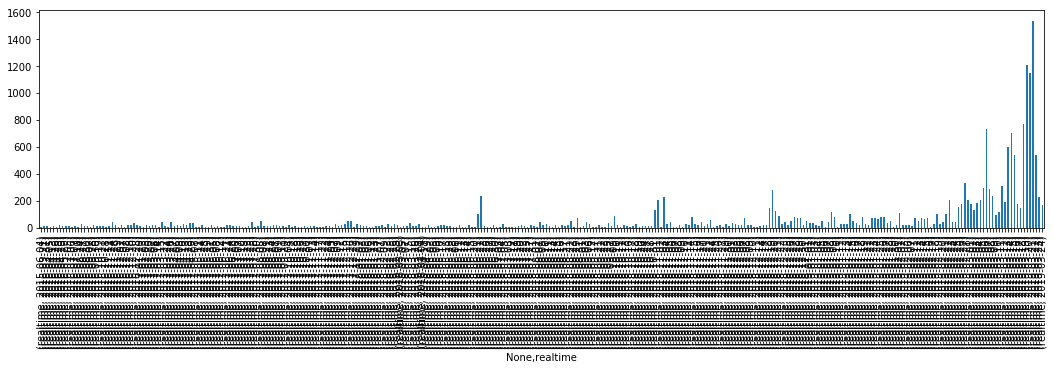

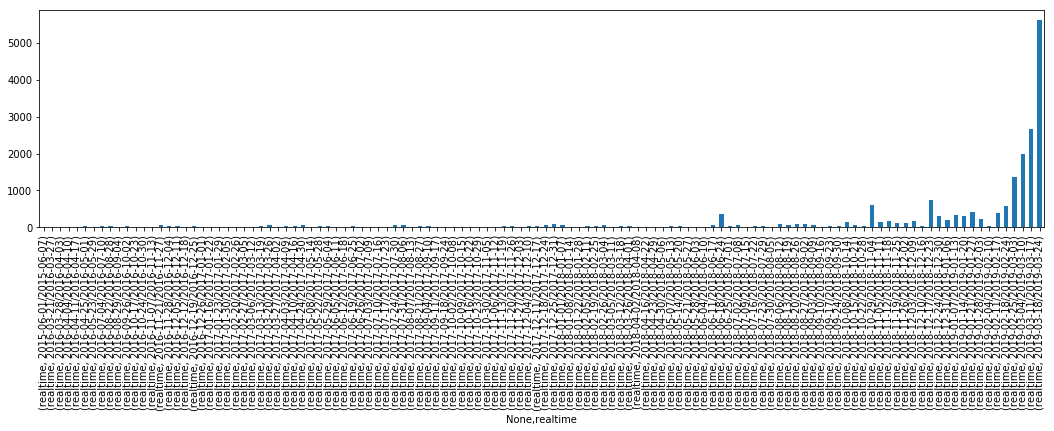

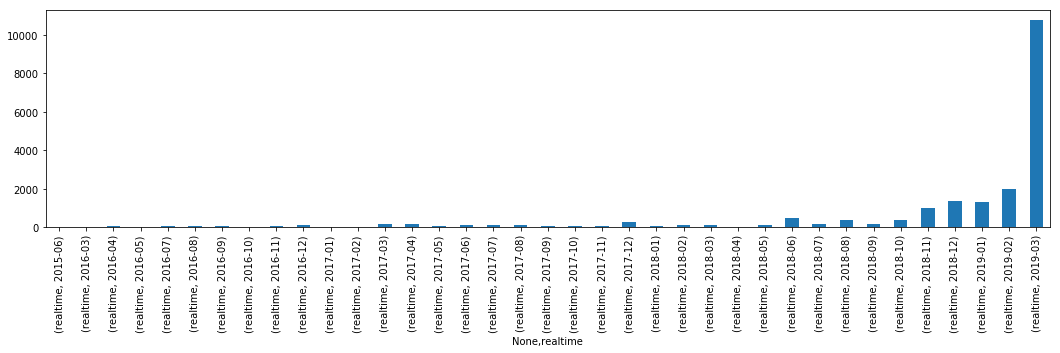

In [18]:
ts = pd.DataFrame(test_sam['realtime'])
ts.set_index('realtime', drop=False, inplace=True)

# ts.groupby(pd.TimeGrouper(freq='10Min')).count().plot(kind='bar')
plt.figure(figsize=(18, 4))
ts.groupby([ts['realtime'].dt.to_period('D')]).count().unstack().plot(kind='bar')
plt.show()
plt.figure(figsize=(18, 4))
ts.groupby([ts['realtime'].dt.to_period('W')]).count().unstack().plot(kind='bar')
plt.show()
plt.figure(figsize=(18, 4))
ts.groupby([ts['realtime'].dt.to_period('M')]).count().unstack().plot(kind='bar')
plt.show()

**Note:** should add density according to time as a feature.

In [44]:
test_sam.head()

,sam_id,ad_id,ad_size,ad_ind_id,item_type,item_id,ad_acc_id,period,user,price,user_att_cnt,est_year,est_mon,est_day,est_weekday,est_hour
0,1,394352,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120,1,2018,6,22,4,14
1,2,585401,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42,4,2019,3,20,2,18
2,3,419408,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6,1,2019,3,20,2,5
3,4,405326,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181,3,2019,3,22,4,15
4,5,578942,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31,1,2018,11,3,5,4


In [52]:
for i in range(7):
    test_sam['period_'+str(i)] = test_sam['period'].apply(lambda x: int(str(x).split(',')[i]))
#     test_sam = extend_time(test_sam, 'period_'+str(i))

In [55]:
test_sam.head()

,sam_id,ad_id,ad_size,ad_ind_id,item_type,item_id,ad_acc_id,period,user,price,est_time_year,est_time_mon,est_time_day,est_time_weekday,est_time_hour,period_0,period_1,period_2,period_3,period_4,period_5,period_6
0,1,394352,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120,2018,6,22,4,14,281474976645120,281474976645120,281474976645120,281474976645120,281474976645120,281474976645120,281474976645120
1,2,585401,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42,2019,3,20,2,18,281474976579587,281474976579587,281474976579587,281474976579587,281474976579587,281474976579587,281474976579587
2,3,419408,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6,2019,3,20,2,5,17592185782272,17592185782272,17592185782272,17592185782272,17592185782272,17592185782272,17592185782272
3,4,405326,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181,2019,3,22,4,15,281474976694272,281474976694272,281474976694272,281474976694272,281474976694272,281474976694272,281474976694272
4,5,578942,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31,2018,11,3,5,4,68719214592,68719214592,68719214592,68719214592,68719214592,68719214592,68719214592


In [100]:
def convert_period(code):
    binary = bin(code)

    start = 0
    duration = 0
    end = 0

    for b in [int(i) for i in str(binary[:1:-1])]:
        if b == 0:
            start += 0.5
        else:
            duration += 0.5
    end = start + duration

    return start, end, duration

In [101]:
# test 
convert_period(17179865088)
convert_period(281474976710655)

[0, 24.0, 24.0]

In [104]:
def extend_period(df, col):
    df[col+'_start'], df[col+'_end'], df[col+'_dur'] = zip(*df[col].apply(lambda x: convert_period(x)))
    del df[col]
    return df

In [88]:
test_sam.head()

,sam_id,ad_id,est_time,ad_size,ad_ind_id,item_type,item_id,ad_acc_id,period,user,price,period_0
0,1,394352,1529648412,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120,281474976645120
1,2,585401,1553076190,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42,281474976579587
2,3,419408,1553031394,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6,17592185782272
3,4,405326,1553238836,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181,281474976694272
4,5,578942,1541191585,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31,68719214592


In [105]:
for i in range(7):
    test_sam['period_'+str(i)] = test_sam['period'].apply(lambda x: int(str(x).split(',')[i]))
    test_sam = extend_period(test_sam, 'period_'+str(i))
test_sam.head()

,sam_id,ad_id,est_time,ad_size,ad_ind_id,item_type,item_id,ad_acc_id,period,user,price,period_0_start,period_0_end,period_0_dur,period_1_start,period_1_end,period_1_dur,period_2_start,period_2_end,period_2_dur,period_3_start,period_3_end,period_3_dur,period_4_start,period_4_end,period_4_dur,period_5_start,period_5_end,period_5_dur,period_6_start,period_6_end,period_6_dur
0,1,394352,1529648412,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0
1,2,585401,1553076190,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5
2,3,419408,1553031394,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0
3,4,405326,1553238836,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0
4,5,578942,1541191585,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0


In [129]:
# del test_sam['period']
test_sam.head()

,sam_id,ad_id,est_time,ad_size,ad_ind_id,item_type,item_id,ad_acc_id,user,price,period_0_start,period_0_end,period_0_dur,period_1_start,period_1_end,period_1_dur,period_2_start,period_2_end,period_2_dur,period_3_start,period_3_end,period_3_dur,period_4_start,period_4_end,period_4_dur,period_5_start,period_5_end,period_5_dur,period_6_start,period_6_end,period_6_dur
0,1,394352,1529648412,34,84,13,29663,26657,"age:819,608,988,741,202,837,400,394,942,361,72...",120,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0,8.0,24.0,16.0
1,2,585401,1553076190,40,221,1,-1,6262,"age:819,433,479,741,229,347,522,79,753,601|edu...",42,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5,7.5,24.0,16.5
2,3,419408,1553031394,30,122,13,32110,17436,all,6,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0,9.0,22.0,13.0
3,4,405326,1553238836,64,136,1,-1,22359,"age:333,1|gender:2|area:11505,1874,3790,4566,5...",181,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0,7.0,24.0,17.0
4,5,578942,1541191585,34,12,13,6372,24082,"age:819,608,988,741,202,837,400,394,942,361,72...",31,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0,9.0,18.0,9.0


In [22]:
print(test_sam['user'][1])
print(test_sam['user'][3])

age:819,433,479,741,229,347,522,79,753,601|education:1,5,4,7|connectionType:2,4|behavior:13697,38541,8928,14071,33280,27010,23023,20350,22367,37936,1962,6827,3277,28312,18667,40218,36755,34334,23555,118,4899,20201,41487,12456,27525,11320,10205,31067,36989,10107,33303,12692,24428,36642,40786,32234,21752,38500,9802,22861,30212,13628,42236,793,17423,3488,17719,621,32601,15882,30513,41602,23095,1216,2588,32727,30289,9294,38623,11681,
age:333,1|gender:2|area:11505,1874,3790,4566,5087,7048,5867,4195,1641,11390


In [23]:
string = test_sam['user'][3]

coll = dict()

for sec in string.split('|'):
    coll['user_'+sec.split(':')[0]] = sec.split(':')[1]
print(coll)

{'user_age': '333,1', 'user_gender': '2', 'user_area': '11505,1874,3790,4566,5087,7048,5867,4195,1641,11390'}


In [24]:
df_temp = pd.DataFrame(columns=['user_age', 'user_gender', 'user_area', 'user_education', 'user_connectionType', 
                                'user_behavior'])
df_temp['user'] = test_sam['user']
df_temp.head()

,user_age,user_gender,user_area,user_education,user_connectionType,user_behavior,user
0,NaN,NaN,NaN,NaN,NaN,NaN,"age:819,608,988,741,202,837,400,394,942,361,72..."
1,NaN,NaN,NaN,NaN,NaN,NaN,"age:819,433,479,741,229,347,522,79,753,601|edu..."
2,NaN,NaN,NaN,NaN,NaN,NaN,all
3,NaN,NaN,NaN,NaN,NaN,NaN,"age:333,1|gender:2|area:11505,1874,3790,4566,5..."
4,NaN,NaN,NaN,NaN,NaN,NaN,"age:819,608,988,741,202,837,400,394,942,361,72..."


In [37]:
for c in [*coll.keys()]:
    print(coll[c])
    df_temp[c][3] = coll[c]

333,1
2
11505,1874,3790,4566,5087,7048,5867,4195,1641,11390


In [38]:
df_temp.head()

,user_age,user_gender,user_area,user_education,user_connectionType,user_behavior,user
0,NaN,NaN,NaN,NaN,NaN,NaN,"age:819,608,988,741,202,837,400,394,942,361,72..."
1,NaN,NaN,NaN,NaN,NaN,NaN,"age:819,433,479,741,229,347,522,79,753,601|edu..."
2,NaN,NaN,NaN,NaN,NaN,NaN,all
3,"333,1",2,"11505,1874,3790,4566,5087,7048,5867,4195,1641,...",NaN,NaN,NaN,"age:333,1|gender:2|area:11505,1874,3790,4566,5..."
4,NaN,NaN,NaN,NaN,NaN,NaN,"age:819,608,988,741,202,837,400,394,942,361,72..."


In [40]:
def user_dict(string):
    coll = dict()
    if string == 'all':
        return coll
    for sec in string.split('|'):
        coll['user_'+sec.split(':')[0]] = sec.split(':')[1]
    return coll

test_sam['user_dict'] = test_sam['user'].apply(user_dict)

In [41]:
test_sam['user_dict'].head()

0    {'user_age': '819,608,988,741,202,837,400,394,...
1    {'user_age': '819,433,479,741,229,347,522,79,7...
2                                                   {}
3    {'user_age': '333,1', 'user_gender': '2', 'use...
4    {'user_age': '819,608,988,741,202,837,400,394,...
Name: user_dict, dtype: object

In [51]:
test_sam = pd.concat([test_sam, pd.DataFrame(columns=['user_age', 'user_gender', 'user_area', 'user_education', 
                                                      'user_connectionType', 'user_behavior', 'user_device',
                                                      'user_consuptionAbility', 'user_status', 'user_work'])])

In [52]:
for ind, dic in enumerate(test_sam['user_dict']):
    for c in [*dic.keys()]:
        test_sam[c][ind] = dic[c]

In [55]:
# del test_sam['user']
# del test_sam['user_dict']

test_sam.head(10)

,ad_acc_id,ad_id,ad_ind_id,ad_size,est_time_day,est_time_hour,est_time_mon,est_time_weekday,est_time_year,item_id,item_type,period,price,realtime,sam_id,user,user_age,user_area,user_behavior,user_connectionType,user_consuptionAbility,user_device,user_education,user_gender,user_status,user_work
0,26657.0,394352.0,84.0,34.0,22.0,14.0,6.0,4.0,2018.0,29663.0,13.0,"281474976645120,281474976645120,28147497664512...",120.0,2018-06-22 14:20:12,1.0,"age:819,608,988,741,202,837,400,394,942,361,72...","819,608,988,741,202,837,400,394,942,361,728,75...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6262.0,585401.0,221.0,40.0,20.0,18.0,3.0,2.0,2019.0,-1.0,1.0,"281474976579587,281474976579587,28147497657958...",42.0,2019-03-20 18:03:10,2.0,"age:819,433,479,741,229,347,522,79,753,601|edu...","819,433,479,741,229,347,522,79,753,601",NaN,"13697,38541,8928,14071,33280,27010,23023,20350...","2,4",NaN,NaN,"1,5,4,7",NaN,NaN,NaN
2,17436.0,419408.0,122.0,30.0,20.0,5.0,3.0,2.0,2019.0,32110.0,13.0,"17592185782272,17592185782272,17592185782272,1...",6.0,2019-03-20 05:36:34,3.0,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22359.0,405326.0,136.0,64.0,22.0,15.0,3.0,4.0,2019.0,-1.0,1.0,"281474976694272,281474976694272,28147497669427...",181.0,2019-03-22 15:13:56,4.0,"age:333,1|gender:2|area:11505,1874,3790,4566,5...","333,1","11505,1874,3790,4566,5087,7048,5867,4195,1641,...",NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,24082.0,578942.0,12.0,34.0,3.0,4.0,11.0,5.0,2018.0,6372.0,13.0,"68719214592,68719214592,68719214592,6871921459...",31.0,2018-11-03 04:46:25,5.0,"age:819,608,988,741,202,837,400,394,942,361,72...","819,608,988,741,202,837,400,394,942,361,728,75...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18260.0,269774.0,122.0,40.0,4.0,11.0,3.0,0.0,2019.0,23440.0,13.0,"17592184995840,17592184995840,17592184995840,1...",49.0,2019-03-04 11:52:16,6.0,area:12041,NaN,12041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9609.0,416368.0,84.0,34.0,27.0,5.0,12.0,3.0,2018.0,1855.0,13.0,"267386880,267386880,267386880,267386880,267386...",113.0,2018-12-27 05:37:05,7.0,"age:819,608,988,741,202,837,400,394,942,361,72...","819,608,988,741,202,837,400,394,942,361,728,75...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,18556.0,574309.0,25.0,14.0,18.0,17.0,12.0,1.0,2018.0,-1.0,1.0,"281474976706560,281474976706560,28147497670656...",34.0,2018-12-18 17:01:01,8.0,"age:608,988,202,837,5,400,394,714,972,942,361,...","608,988,202,837,5,400,394,714,972,942,361,728,...","1209,1130,14321,14001,13101,9242,9751,13127,72...","611,13535,14461,26904,27306,27560,27671,39938,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3408.0,142702.0,50.0,1.0,21.0,20.0,12.0,4.0,2018.0,-1.0,1.0,"281474976710655,281474976710655,28147497671065...",358.0,2018-12-21 20:54:11,9.0,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,616.0,255347.0,122.0,40.0,11.0,14.0,3.0,0.0,2019.0,6657.0,13.0,"281474976694272,281474976694272,28147497669427...",30.0,2019-03-11 14:52:22,10.0,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
